<a href="https://colab.research.google.com/github/terminate9298/K-Means-Clustering-Implementation/blob/main/K%20Means%20Clustering%20Implementaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
<a href = "https://colab.research.google.com/drive/1jErqvQ1zcZ7CzjAzrzdFq2_cD5kOm2-6?usp=sharing">
Open in Colab</a></h1>

# Loading Libraries and Preprocessing Dataset

In [305]:
import pandas as pd
import numpy as np
import time
import math
# Plotting
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
from matplotlib.offsetbox import AnchoredText
from matplotlib.lines import Line2D
import seaborn as sns
import plotly.offline as py
import plotly.express as px
from sklearn.decomposition import PCA , TruncatedSVD
from sklearn.metrics import pairwise_distances
import json , shutil , re , datetime , requests , cv2 , os , warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_context("paper")
%matplotlib inline


In [306]:
file_name = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(file_name)
df['species_'] = df['species'].map({'setosa':0,'versicolor':1,'virginica':2})

pca = TruncatedSVD(2)
df_pca = pca.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
df_pca = pd.DataFrame(df_pca , columns = ['Col_1', 'Col_2'])
df_pca['species'] = df['species']
df_pca['species_'] = df['species_']

# Visualizations and EDA

There is Clear Varience in Different Species of Iris's ...
Similar Relations are Foudn to exist in Other Columns too..


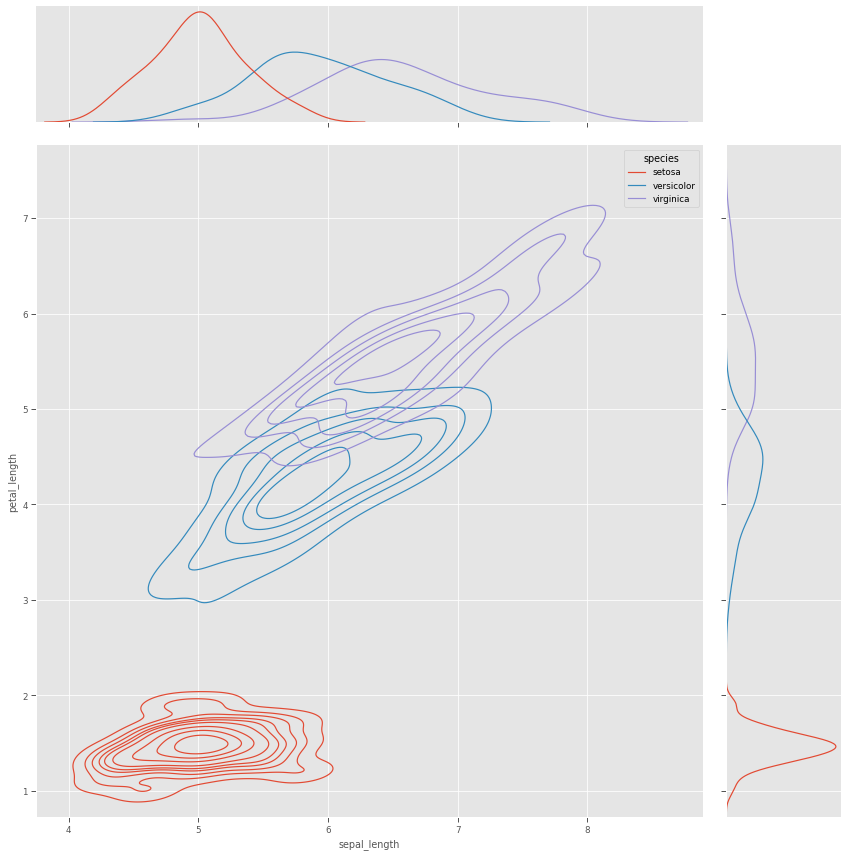

In [307]:
sns.jointplot(x=df.sepal_length,y=df.petal_length , hue = df.species , kind='kde' , height = 12)
print("There is Clear Varience in Different Species of Iris's ...\nSimilar Relations are Foudn to exist in Other Columns too..")

[]

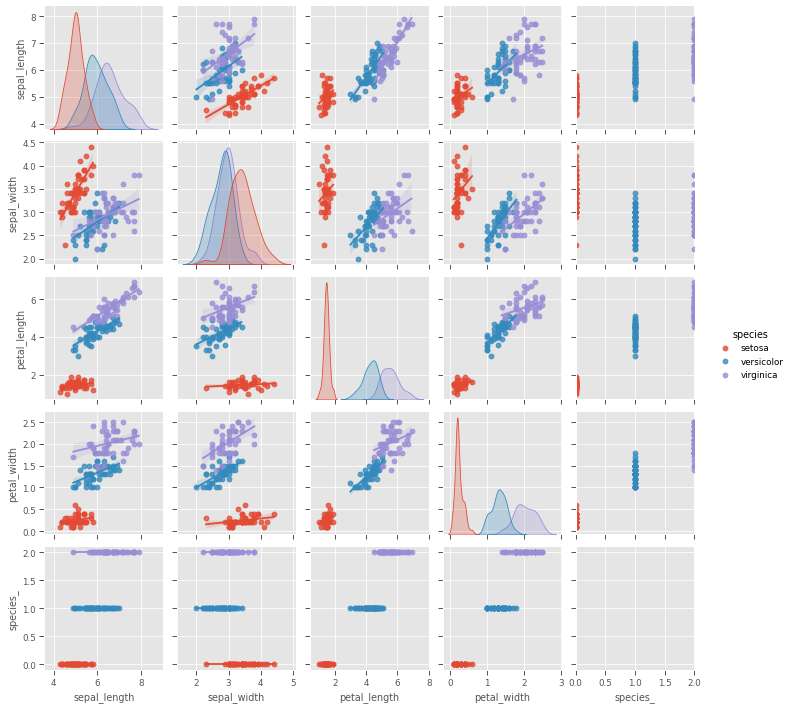

In [308]:
sns.pairplot(df  , hue = 'species' , kind = 'reg' , height = 2 )
plt.plot()

[]

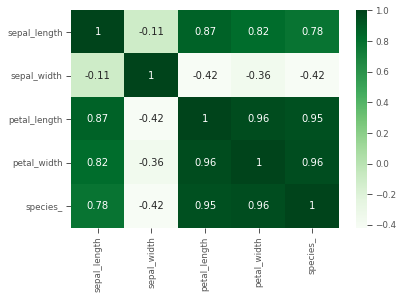

In [309]:
sns.heatmap(df.corr(),cmap='Greens',annot=True)
plt.plot()

[]

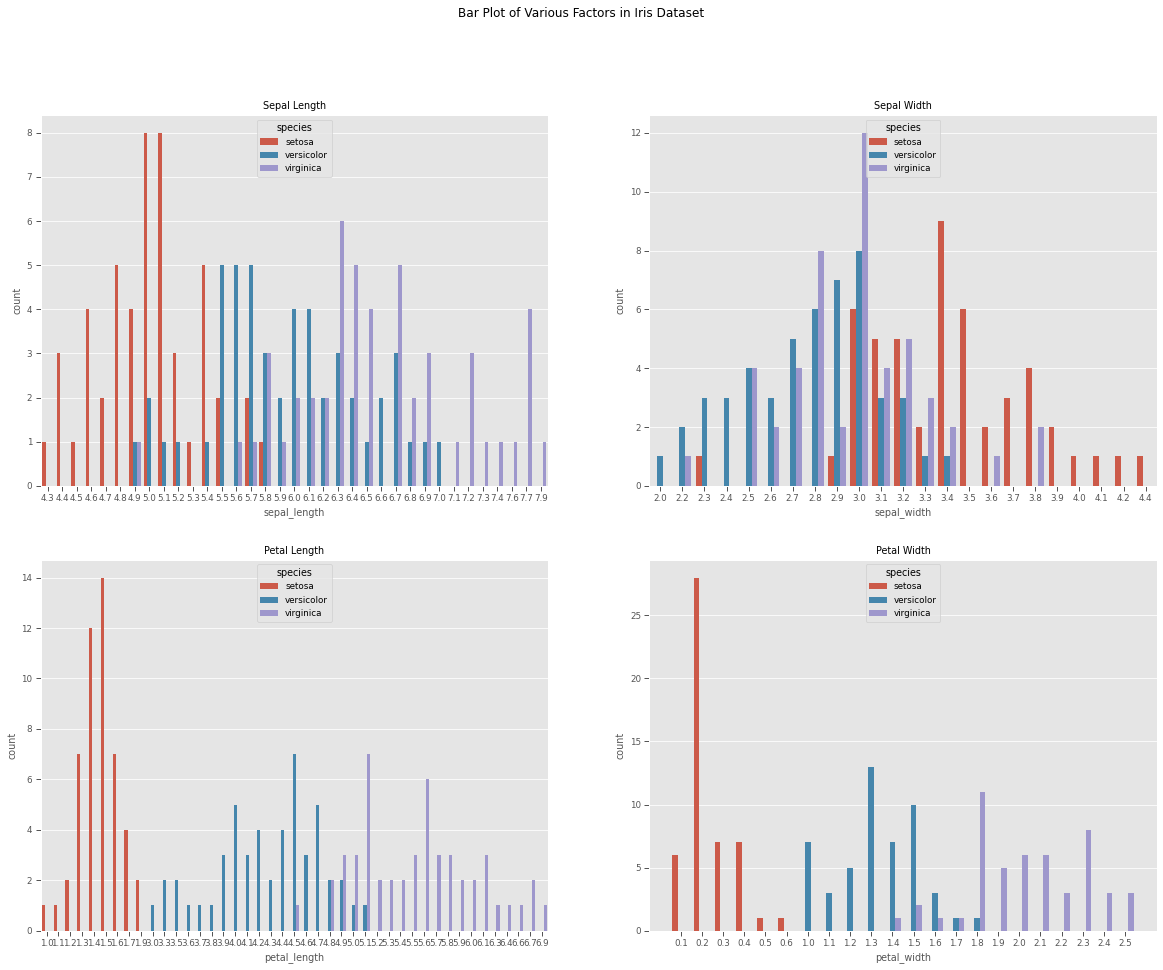

In [310]:
plt.figure(figsize=(20,15))
plt.suptitle('Bar Plot of Various Factors in Iris Dataset')
plt.subplot(2,2,1)
sns.countplot(df['sepal_length'] , dodge = True , hue = df['species'])
plt.title('Sepal Length')
plt.subplot(2,2,2)
sns.countplot(df['sepal_width'] , dodge = True  , hue = df['species'])
plt.title('Sepal Width')
plt.subplot(2,2,3)
sns.countplot(df['petal_length'] , dodge = True  ,  hue = df['species'])
plt.title('Petal Length')
plt.subplot(2,2,4)
sns.countplot(df['petal_width'] , dodge = True  ,  hue = df['species'])
plt.title('Petal Width')
plt.plot()

## Over PCA Data

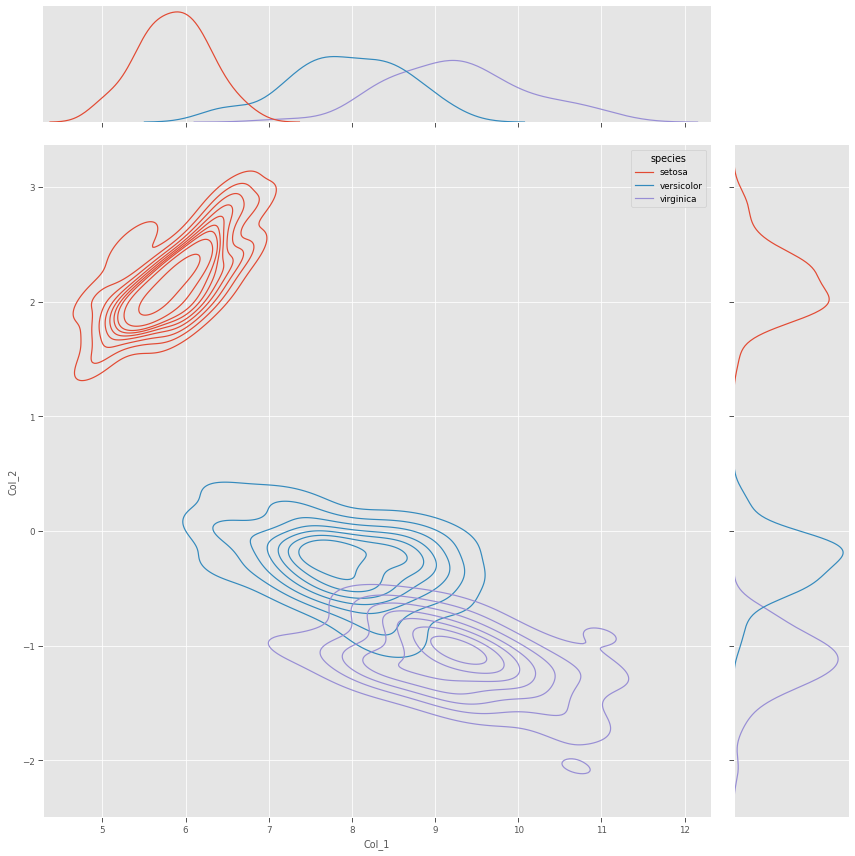

In [311]:
sns.jointplot(x=df_pca.Col_1,y=df_pca.Col_2 , hue = df_pca.species , kind='kde' , height = 12)

[]

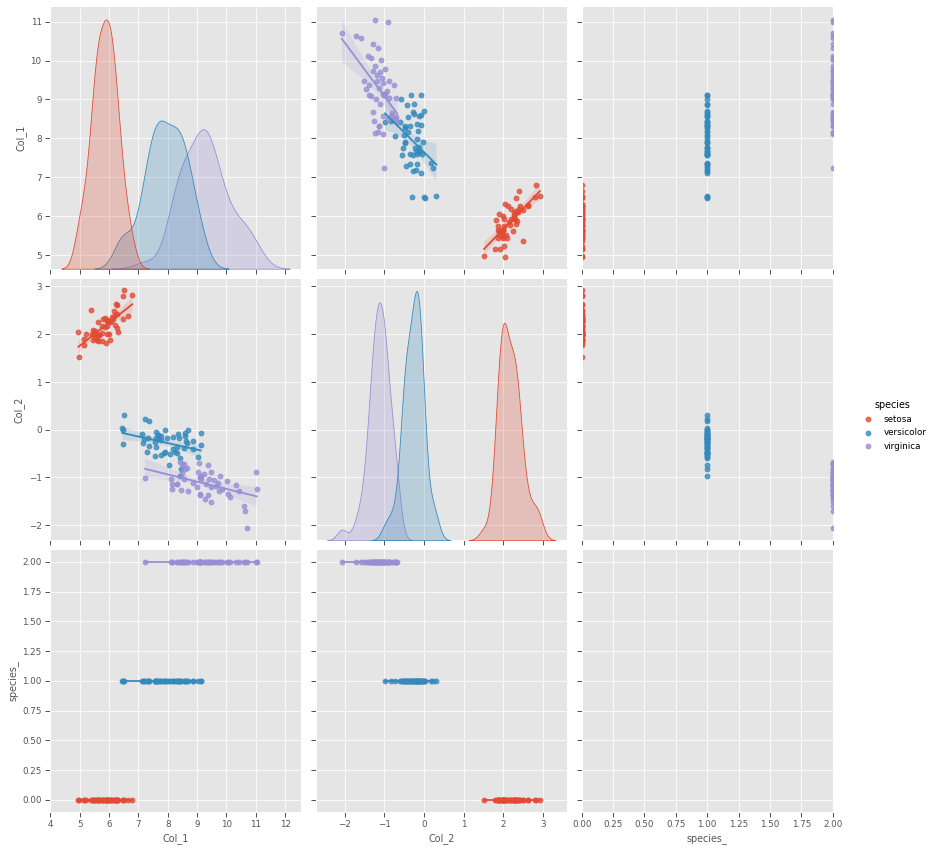

In [312]:
sns.pairplot(df_pca  , hue = 'species' , kind = 'reg' , height = 4 )
plt.plot()

# Clustering

### Implementation 1

In [313]:
# Using Euclidean Distance
def compute_euclidean_distance(point, centroid):
  return np.sqrt(np.sum((point - centroid)**2))

class K_Means:
  def __init__(self , k = 3 , max_iterations = 500):
    self.K = k
    self.Max_Iter = max_iterations
    self.distance_fn = compute_euclidean_distance
    self.Centroids_Logs = []

  def fit(self, X):
    self.X = X
    self.create_centroids()
    self.iteration()

  def recalculate_centroids(self , m):
    Centrer = []
    for i in range(self.Centroids.shape[0]):
      temp = []
      for j,k in zip(self.assignments , range(self.X.shape[0])):
        if i == j:
          temp.append(self.X[k])
      temp = np.array(temp)
      if temp.shape[0] == 0:
        if m<10:
          # If a Centroids is somehow stuck outside the area this can to reintialise it .. But only in Initial Phase
          Centrer.append(self.recalculate_center())
        else:
          # When no Point is Found for Centroids
          Centrer.append(self.Centroids[i])
      else:
        Centrer.append(np.array(temp).mean(axis = 0))
    
    self.Centroids_Logs.append(Centrer)
    self.Centroids = np.array(Centrer)

  def iteration(self):
    self.assignments = np.random.randint(0 , self.K , (self.X.shape[0]) )
    for m in range(self.Max_Iter):
      self.distance = [[self.distance_fn(point, c) for c in self.Centroids] for point in self.X]
      self.recalculate_centroids(m)
      self.assignments = np.argmin(self.distance , axis = 1)

  def recalculate_center(self):
    return self.X[np.random.randint(0,self.X.shape[0])]

  def create_centroids(self):
    self.Centroids = np.random.rand(self.K ,self.X.shape[1]) * (self.X.max(axis = 0) - self.X.min(axis = 0)) + self.X.min(axis = 0)
    self.Centroids_Logs.append(self.Centroids)

  def predict(self , Y):
    distance = [[self.distance_fn(point, c) for c in self.Centroids] for point in Y]
    return np.argmin(distance , axis = 1)

In [314]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
kmm = K_Means()
kmm.fit(X)
df_pca['Assigns'] = kmm.predict(X)
tm = pca.transform(kmm.Centroids)

[]

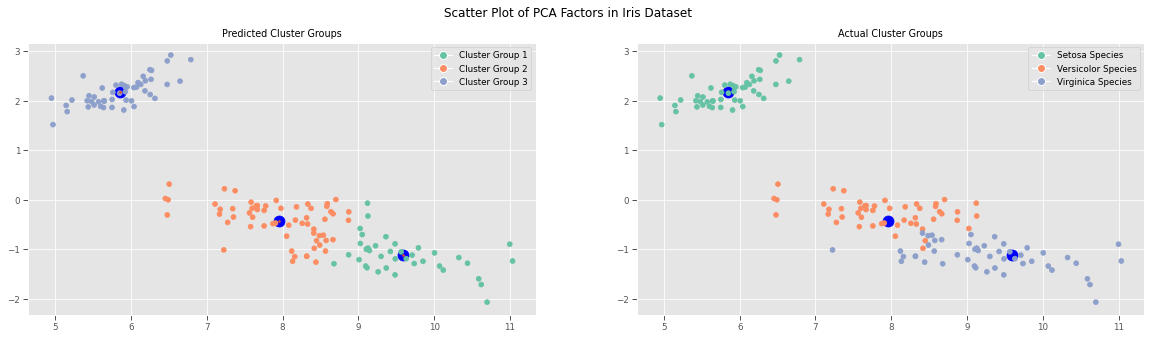

In [317]:
plot_color = list(sns.color_palette('Set2',n_colors=3).as_hex())
plt.figure(figsize=(20,5))
plt.suptitle('Scatter Plot of PCA Factors in Iris Dataset')
legend_elements_1 = [ 
                   Line2D([0], [0], marker='o', color='w', label='Setosa Species', markerfacecolor=plot_color[0], markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Versicolor Species', markerfacecolor=plot_color[1], markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Virginica Species', markerfacecolor=plot_color[2], markersize=8)
                   ]
legend_elements_2 = [ 
                   Line2D([0], [0], marker='o', color='w', label='Cluster Group 1', markerfacecolor=plot_color[0], markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Cluster Group 2', markerfacecolor=plot_color[1], markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Cluster Group 3', markerfacecolor=plot_color[2], markersize=8)
                   ]
plt.subplot(1,2,1)
plt.scatter(tm[:,0] , tm[:,1] ,s = 120 , c = 'Blue')
plt.scatter( df_pca['Col_1'], df_pca['Col_2'] , c = [plot_color[i] for i in df_pca['Assigns']] )

plt.scatter(tm[:,0] , tm[:,1] ,s = 3)

plt.legend(handles=legend_elements_2)
plt.title('Predicted Cluster Groups')

plt.subplot(1,2,2)
plt.scatter(tm[:,0] , tm[:,1] ,s = 120 , c = 'Blue')
plt.scatter(df_pca['Col_1'], df_pca['Col_2'] , c = [plot_color[i] for i in df_pca['species_']] )

plt.legend(handles=legend_elements_1)
plt.title('Actual Cluster Groups')
plt.plot()

### [Implementation 2](https://www.kaggle.com/dfoly1/k-means-clustering-from-scratch)
Taken from Kaggle (To Check Correctness)

In [318]:
class Kmeans:
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
    def initialise_centroids(self, data):
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
       
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):

        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    def convergence_calculation(self):

        pass
    
    def predict(self, data):
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):

        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self    



In [319]:
temp_k  = Kmeans(3, 1, 600)
temp_fitted  = temp_k.fit_kmeans(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values)
df_pca['Assigns'] = temp_k.predict(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values)
tm = pca.transform(temp_k.centroids)

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


[]

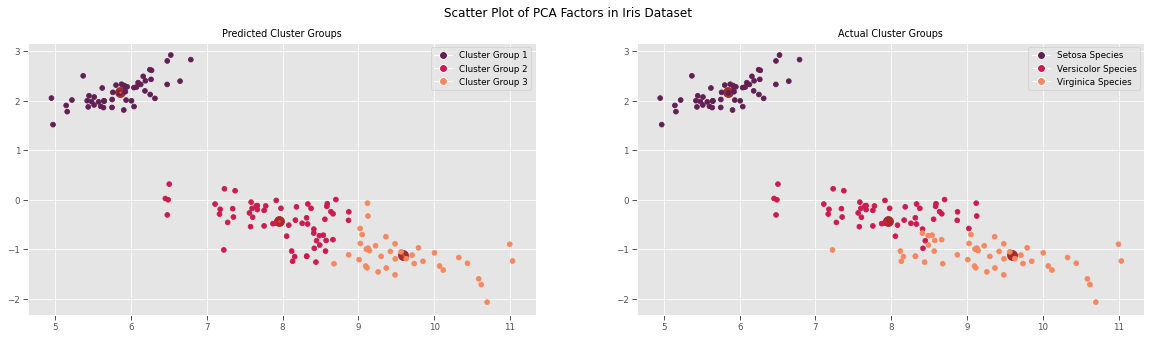

In [322]:
plot_color = list(sns.color_palette('rocket',n_colors=3).as_hex())
plt.figure(figsize=(20,5))
plt.suptitle('Scatter Plot of PCA Factors in Iris Dataset')
legend_elements_1 = [ 
                   Line2D([0], [0], marker='o', color='w', label='Setosa Species', markerfacecolor=plot_color[0], markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Versicolor Species', markerfacecolor=plot_color[1], markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Virginica Species', markerfacecolor=plot_color[2], markersize=8)
                   ]
legend_elements_2 = [ 
                   Line2D([0], [0], marker='o', color='w', label='Cluster Group 1', markerfacecolor=plot_color[0], markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Cluster Group 2', markerfacecolor=plot_color[1], markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Cluster Group 3', markerfacecolor=plot_color[2], markersize=8)
                   ]
plt.subplot(1,2,1)
plt.scatter(tm[:,0] , tm[:,1] ,s = 100 , c = 'Brown')
plt.scatter( df_pca['Col_1'], df_pca['Col_2'] , c = [plot_color[i] for i in df_pca['Assigns']] )

plt.scatter(tm[:,0] , tm[:,1] ,s = 3)

plt.legend(handles=legend_elements_2)
plt.title('Predicted Cluster Groups')

plt.subplot(1,2,2)
plt.scatter(tm[:,0] , tm[:,1] ,s = 100 , c = 'Brown')
plt.scatter(df_pca['Col_1'], df_pca['Col_2'] , c = [plot_color[i] for i in df_pca['species_']] )

plt.legend(handles=legend_elements_1)
plt.title('Actual Cluster Groups')
plt.plot()

# Conclusion

The Coded Implementation of K Means Clustering Work Perfectly fine giving perfect Centroids and Predictions